<b>배경</b><br>
Udacity는 온라인 학습 콘텐츠를 만드는 회사입니다. 이 기업은 홈페이지에 '무료 체험'과 '강의 자료만 이용'이라는 버튼을 만들었습니다. 이 버튼을 누르게 되면 자신의 신용카드 정보를 입력한 뒤 2주간 유료 콘텐츠를 무료로 들을 수 있습니다. 2주 후에 수강 취소 버튼을 누르지 않는다면 강의비가 자동 결제 됩니다. '강의 자료만 이용' 버튼을 누르면 강의 비디오나 퀴즈를 무료로 이용할 수 있지만 유료 콘텐츠에 있는 학습 지도나 수강 이수증을 받을 수가 없습니다. <br>
<br>
Udacity는 '무료 체험'을 수강하고 중간에 포기하는 학생들을 보며 학생들이 중간에 포기하지 않게 하려면 어떤 시스템을 도입해야 할지 고민하다가 한 가지 시스템을 도입했습니다. 그것은 수강생이 '무료 체험' 버튼을 누르면 일주일에 강의에 얼마나 시간을 투자할 수 있는지 입력하게 하는 것이 었습니다. 만약 5시간 이상 투자할 수 있다고 답변하면 '무료 체험'을 바로 이용할 수 있습니다. 하지만 만약 5시간 이상 투자할 수 없다고 하면 Udacity 강의를 제대로 배우려면 시간을 많이 투자해야 하기 때문에 '강의 자료만 이용' 을 이용하도록 권유합니다. 수강생은 이 문구를 보고 '무료 체험'과 '강의 자료만 이용' 중 어떤 것을 선택할지 고민하게 됩니다. <br>

<b>데이터 수집</b><br>
이 방법이 실제로 '무료 체험'을 누른 수강생의 학습 중도 포기율을 낮출 수 있는 효과가 있는지 실험을 해보기로 했습니다. 실험을 통제하기 위해 '무료 체험'에 동의한 수강생들의 아이디와 접속기록을 수집하고 '무료 체험'에 동의하지 않은 수강생의 정보는 수집하지 않았습니다. 그리고 같은 아이디로 같은 강의를 중복해서 수강할 수 없게 했습니다.<br>
<br>
<b>실험 설계</b><br>
- 먼저 새로운 시트템을 도입한 (new page)와 기존의 페이지 (old page)로 나누어 실험을 진행
- 실험군(treatment)에게는 새로운 페이지(new page)로 수강 진행, 대조군(control)에게는 기존 페이지(old page)를 보여줌<br>
<br>
<b>목적</b><br>
- 새로운 시스템의 도입 여부가 수강생이 중간에 강의를 덜 그만 두게 할까?
- 데이터가 실시간으로 들어올 때 언제쯤 실험을 중단해도 될까?

출처:
- https://www.kaggle.com/zhangluyuan/a-b-testing/data
- https://rpubs.com/Shaahin/ab-test-udacity<br>
<br>
데이터:
- https://www.kaggle.com/zhangluyuan/a-b-testing/data
- https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True

# 1. 데이터 소개 및 전처리

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/bki19/Desktop/A_B_testing')
%matplotlib inline

In [20]:
df=pd.read_csv('./data/ab_data.csv')

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
print(df.shape)

(294478, 5)


- 데이터에 대한 설명이 없어 부족한 부분은 데이터를 보고 적절하게 가정하였습니다.
- 데이터 수: 관측치 294,478개
- 변수 설명: 사용자 아이디(user_id), 시간(timestamp), 실험군 (group), 방문 페이지(landing_page),전환(converted)
- 시간: 2017/1/2 1:42:05 PM부터 2017/1/24  1:41:54 PM (약 22일간) => 2주가 됐을 때의 시간
- 실험군(Control): 새로운 시스템 적용 안 한 그룹
- 대조군(Treatment): 새로운 시스템 적용 한 그룹
- 전환(Converted): 0: 중간에 수강 포기, 1: 수강 포기 안함 

<b>1. 데이터 이상 값 확인 (중복 여부, 결측치)</b>

In [17]:
len(df['user_id'].unique())

290584

설명과는 달리 중복 되는 id가 4000개 정도 있었습니다.

In [26]:
print(df['user_id'] [df['user_id'] .duplicated()].head())

2656     698120
2893     773192
7500     899953
8036     790934
10218    633793
Name: user_id, dtype: int64


In [33]:
print(df[df['user_id']==698120])
print(df[df['user_id']==773192])
print(df[df['user_id']==899953])

      user_id                   timestamp    group landing_page  converted
988    698120  2017-01-22 07:09:37.540970  control     new_page          0
2656   698120  2017-01-15 17:13:42.602796  control     old_page          0
      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0
      user_id                   timestamp      group landing_page  converted
3489   899953  2017-01-05 05:36:02.120641  treatment     new_page          0
7500   899953  2017-01-07 03:06:54.068237    control     new_page          0


중복이 있는 아이디 중 몇 개를 살펴 봤을 때 대조군이면서 새로운 페이지를 본 경우가 있었습니다.<br>
그리고 같은 아이디에 대해 실험 그룹이 다르게 나오는 경우도 있었습니다.<br>
이 것으로 보아 혹시 대조군은 new_page, 실험군은 old_page로 두어야하는 실험 설계가 잘 못 됐는지 확인해봤습니다.

In [9]:
print(df[(df.group == 'treatment') & (df.landing_page == 'new_page')].shape)
print(df[(df.group == 'control') & (df.landing_page == 'old_page')].shape)
print(df[(df.group == 'treatment') & (df.landing_page == 'new_page')].shape[0]+df[(df.group == 'control') & (df.landing_page == 'old_page')].shape[0])

(145311, 5)
(145274, 5)
290585


다행히도 제대로 설정된 데이터가 290,585개로 대부분의 데이터가 적절했습니다.
또한 실험군과 대조군의 수는 거의 비슷한 balanced expreiment였습니다.

In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

열 별로 결측치 확인 결과 결측치가 없었습니다.

<b>2. 데이터 정제</b>

In [40]:
df2=df[(df.group == 'treatment') & (df.landing_page == 'new_page')]
df2=df2.append(df[(df.group == 'control') & (df.landing_page == 'old_page')])
df2.shape

(290585, 5)

In [41]:
print(df2[df2['user_id']==773192])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


In [44]:
df2=df2.drop_duplicates(subset='user_id',keep=False)

In [56]:
df2['timestamp']=pd.to_datetime(df2['timestamp'])
df2=df2.sort_values('timestamp')

실험군과 대조군이 제대로 설정 되어 있는 데이터를 필터링하고 중복 되는 아이디는 모두 제거했습니다

# 2. 탐색적 데이터 분석

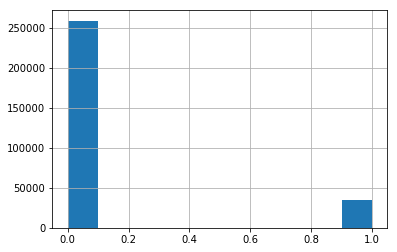

In [87]:
df2['converted'].hist()

In [88]:
df2['converted'].describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

전체 데이터에서 대부분의 값이 0으로 중도에 이탈하는 수가 많았습니다.<br>
지속하는 경우는 11.96% 정도였습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5C23E7A90>]],
      dtype=object)

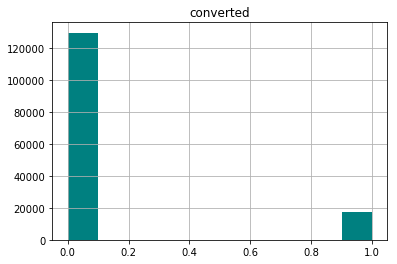

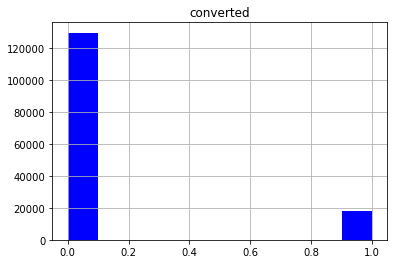

In [90]:
df2[df2['group']=='treatment'][['group','converted']].hist(color = 'teal')
df2[df2['group']=='control'][['group','converted']].hist(color = 'blue')

In [89]:
df2[['group','converted']].groupby('group').describe()

converted                                             
              count      mean       std  min  25%  50%  75%  max
group                                                           
control    147202.0  0.120399  0.325429  0.0  0.0  0.0  0.0  1.0
treatment  147276.0  0.118920  0.323695  0.0  0.0  0.0  0.0  1.0

실험군과 대조군의 평균을 비교 했을 때 0.1% 정도 차이로 매우 작았고<br>
표준편차 역시 차이가 작았습니다.
눈으로 봤을 때 분포에도 큰 차이가 없어 보였습니다

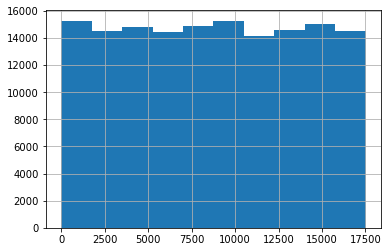

In [91]:
df2[df2['group']=='treatment']['converted'].cumsum().hist()

In [ ]:
df2[['group','converted']]

In [ ]:
df_grp = df.groupby('group')
df_grp.describe()

In [70]:
Treat=df2[df2['group']=='treatment']
Control=df2[df2['group']=='control']


C:\Users\bki19\Anaconda3\envs\tf36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bki19\Anaconda3\envs\tf36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


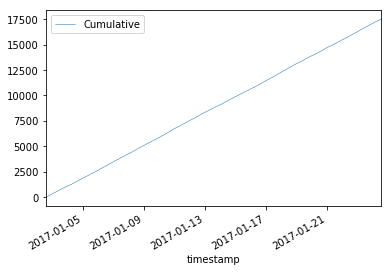

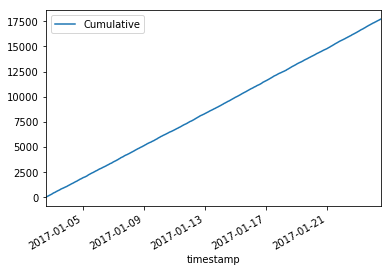

In [75]:
%matplotlib inline
Treat.plot(x='timestamp', y='Cumulative',linewidth=0.5)
Control.plot(x='timestamp', y='Cumulative')

In [65]:
Treat['Consumption'].plot(linewidth=0.5);

ValueError: view limit minimum -36817.678532463644 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B5C1DAAF28> (for post_execute):


ValueError: view limit minimum -36817.678532463644 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36817.678532463644 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [45]:
"%.4f" % (df.converted.sum() / df.converted.count())

'0.1197'

In [36]:
df.groupby(['group','landing_page']).count()['converted']

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: converted, dtype: int64

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [41]:
df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')]
df2.shape

(145311, 5)

In [42]:
df2.user_id.nunique()

145310

In [44]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)